## Importing Libs. of Python

In [240]:
'''  FOR ML MODELS '''

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
from matplotlib import image as img 
from scipy.stats import stats,mode
import seaborn as sns 

'''  for DL MODELS '''

import tensorflow as tf 
from tensorflow import keras 

In [241]:
''' GENERAL PRE-DEFINED FUNCTIONS '''

''' Load and show an image '''

def show(img) :
    i = plt.imread(img)
    plt.imshow(i)

''' Load a dataset '''

def load_data(file) :
    data = pd.read_csv(file)
    return data 

def Convert2CSV(file ,  id_col , predictions  ) :
    id = np.array(id_col)
    prediction = np.array(predictions)

    col = col.reshape(-1 , 1)
    prediction = prediction.reshape(-1 , 1)

    sol = np.concatenate((id , prediction) , axis=1  ) # concatenate parallel to column axis 

    sol = pd.DataFrame(sol , columns  =['id' , 'smoking'])
    res = sol.to_csv(str(file)+ ".csv")


## Loading the Required Datasets

In [242]:
train_data  = load_data("train.csv")
test_data = load_data("test.csv")

In [243]:
print("Training Data  has size" , train_data
      .shape[0] , "rows & " , train_data.shape[1] , "cols")
print("Testing Data  has size" , test_data.shape[0] , "rows & " , test_data.shape[1] , "cols")

Training Data  has size 159256 rows &  24 cols
Testing Data  has size 106171 rows &  23 cols


In [244]:
train_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [245]:
train_data.isnull().sum()


id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [246]:
''' CONCLUSION - No NULL values in the datatset '''

' CONCLUSION - No NULL values in the datatset '

In [247]:
train_data.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
        'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
        'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
        'ALT', 'Gtp', 'dental caries', 'smoking'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=159256, step=1)
 NumericBlock: [ 4  5  6 16 18], 5 x 159256, dtype: float64
 NumericBlock: [ 0  1  2  3  7  8  9 10 11 12 13 14 15 17 19 20 21 22 23], 19 x 159256, dtype: int64,
 '_item_cache': {},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>}

## EDA ( Exploratory Data Analysis )

In [248]:
# ''' relation of smoking with each property '''

# cols = train_data.columns[train_data.columns != ('smoking' or 'id')]


In [284]:
'''  Removing outliers from the data '''


def remove_outliers_iqr(df, threshold=1.5):

    # Create an empty DataFrame to store the cleaned data
    cleaned_df = pd.DataFrame()

    # Iterate through each column in the DataFrame
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Filter the DataFrame to retain non-outliers for this column

            df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            
            # Appending the non-outlier data to the cleaned DataFrame

            cleaned_df = df_no_outliers

    return pd.DataFrame(cleaned_df)

# Apply the function to remove outliers from all numeric columns
train_data = remove_outliers_iqr(train_data)
test_data = remove_outliers_iqr(test_data)

                          age  height(cm)  weight(kg)  waist(cm)  \
age                  1.000000   -0.489608   -0.336859  -0.045369   
height(cm)          -0.489608    1.000000    0.686645   0.409500   
weight(kg)          -0.336859    0.686645    1.000000   0.830208   
waist(cm)           -0.045369    0.409500    0.830208   1.000000   
eyesight(left)      -0.269495    0.209997    0.151794   0.046964   
eyesight(right)     -0.277638    0.216729    0.161344   0.055094   
hearing(left)        0.212889   -0.090110   -0.069761   0.004759   
hearing(right)       0.212972   -0.091760   -0.070679   0.006637   
systolic             0.160437    0.062297    0.241495   0.306150   
relaxation           0.064924    0.114390    0.265921   0.291389   
fasting blood sugar  0.191913    0.017516    0.132409   0.209541   
Cholesterol          0.106873   -0.113455    0.020382   0.075039   
triglyceride        -0.038063    0.252464    0.384313   0.394593   
HDL                  0.041411   -0.303450   -0.4

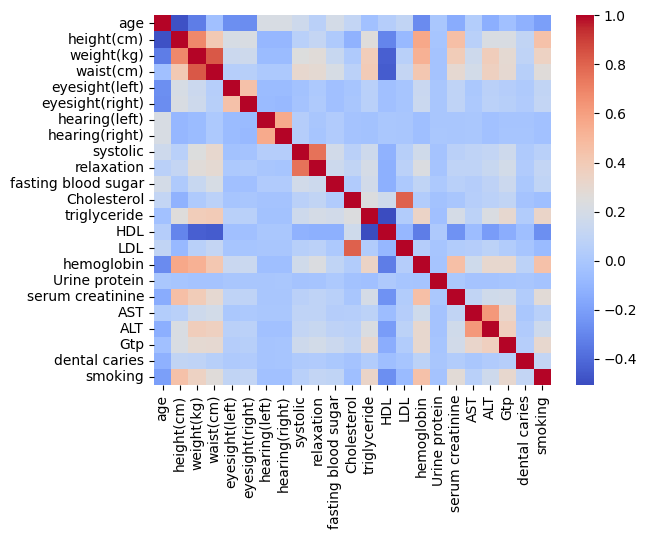

In [285]:


sns.heatmap(train_data.corr() , cmap = "coolwarm")
cor = (train_data.corr())
print(cor)
# High Corr of smoking with -> hameogobin , heigh and weight

In [250]:
''' CONCLUSION FROM DATAFRAME

EVEN WITH SAME VALUE OF FEATURES , NO DISTINCT LINEAR DECISION BOUNDARY IS VISIBLE IN ANY FEATURE WRT SMOKING CLASSES( 0 AND 1)

 '''



' CONCLUSION FROM DATAFRAME\n\nEVEN WITH SAME VALUE OF FEATURES , NO DISTINCT LINEAR DECISION BOUNDARY IS VISIBLE IN ANY FEATURE WRT SMOKING CLASSES( 0 AND 1)\n\n '

In [251]:
col = test_data['id']

In [252]:
''' Removing ID column from dataframe as it is NOT a feature  '''
train_data = train_data .drop(['id'] , axis =1)
test_data = test_data.drop(['id'] , axis =1 )

In [253]:
X_train = train_data.iloc[: , :22]
y_train = train_data['smoking']

X_test = test_data.iloc[: , :23]
y_train

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64

In [254]:
X_test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
6,40,165,80,87.0,1.5,1.5,1,1,128,72,...,95,46,160,15.5,1,1.0,24,30,25,0
7,55,150,50,69.2,1.0,0.9,1,1,152,91,...,89,60,98,14.2,1,0.7,26,20,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106162,75,150,50,80.0,0.9,0.8,1,1,140,77,...,163,53,127,15.2,1,0.7,38,34,21,0
106163,40,155,55,78.2,1.0,1.0,1,1,111,68,...,68,88,122,11.7,1,0.8,16,9,16,0
106166,40,165,60,78.0,0.8,0.9,1,1,112,78,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,40,170,85,95.0,1.2,1.2,1,1,130,90,...,186,44,100,16.0,2,1.0,25,31,38,0


In [311]:
'''FINDING THE CONTINUOUS AND DISCRETE VALUES  '''

data_types = train_data.dtypes
discrete_features = []
continuous_features = []
for column, data_type in data_types.items():
    if np.issubdtype(data_type, np.number) and len(train_data[column].unique()) <= 10:
        discrete_features.append(column)
    else:
        continuous_features.append(column)
        
print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)

Discrete Features: ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking']
Continuous Features: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']


In [256]:
contin_feat = ['height(cm)', 'weight(kg)', 'waist(cm)' , 'fasting blood sugar', 'Cholesterol', 'triglyceride' ,'HDL', 'LDL', 'hemoglobin', 'AST', 'ALT', 'Gtp']

In [257]:
from sklearn.preprocessing import StandardScaler 

scale1 = StandardScaler()


X_train[ contin_feat] = scale1.fit_transform(X_train[contin_feat] )
# X_train = X_train[['height(cm)', 'weight(kg)' ,'Cholesterol']]
X_test[ contin_feat] = scale1.fit_transform(X_test[contin_feat] )

'''  WE ONLY CHOSE The CONTINUOUS VALUES TO SCALE , ACCORDING to the highest positive / highest negative correlation '''

'  WE ONLY CHOSE The CONTINUOUS VALUES TO SCALE , ACCORDING to the highest positive / highest negative correlation '

In [258]:
x = pd.DataFrame(X_train)
x

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,55,-0.030268,-0.567581,-0.223489,0.5,0.6,1,1,135,87,...,2.604429,-1.135246,-1.406581,1.189928,1,1.0,-0.371570,-0.087326,-0.295342,0
1,70,-0.030268,-0.170319,0.669577,0.6,0.7,2,2,146,83,...,-1.097105,0.082162,0.404573,0.980315,1,1.1,0.156700,-0.199983,0.025124,1
2,20,0.536694,0.624205,-0.223489,0.4,0.5,1,1,118,75,...,1.048274,-0.777185,-0.767350,1.818767,1,0.8,0.156700,0.250645,0.537870,0
3,35,1.670617,2.213252,2.455708,1.5,1.2,1,1,131,88,...,1.138923,-1.278470,-0.447734,0.770702,1,1.0,-0.582878,0.025331,-0.199202,1
4,30,-0.030268,-0.567581,-0.279305,1.5,1.0,1,1,121,76,...,-0.613639,-0.848797,-0.767350,0.421347,1,0.8,-0.688532,-0.763267,-0.615808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,-1.164191,-1.759366,-1.563087,1.5,2.0,1,1,127,80,...,-1.217971,1.156345,1.576497,-0.207493,1,0.8,-0.054608,-0.030997,-0.743994,0
159252,50,-1.164191,0.624205,-0.111855,1.0,1.0,1,1,120,80,...,1.123815,0.583447,-0.234657,-0.207493,1,0.6,-0.477224,-0.368968,-0.583761,0
159253,40,-0.597229,-1.362104,-1.897986,1.5,1.0,1,1,114,70,...,-1.248188,2.230528,-0.767350,-2.722849,1,0.6,-1.111148,-0.988581,-0.776041,0
159254,50,-0.030268,0.624205,1.004477,1.2,1.0,1,1,121,90,...,0.307967,-0.061063,-1.229016,-0.277364,1,1.1,-0.371570,-0.537954,0.025124,0


In [259]:
y_train

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64

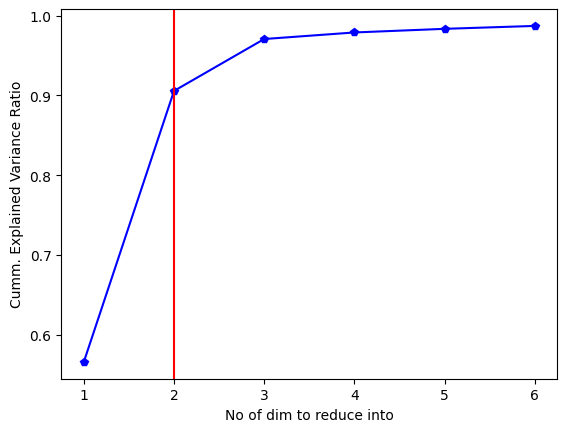

CONCLUSION - ELBOW POINT AT N = 6 , HENCE Optimum No. of Dim  = 10 for dataset to be reduced into 


In [260]:
from sklearn.decomposition import PCA


dim = []
sum= 0

for n in range(1,7) :
    pca = PCA(n_components = n)
    pca.fit(X_train)
    
    t = list(pca.explained_variance_ratio_) # y-value - proportion of total variance preserved
    sum+=t[-1]
    dim.append(sum)

plt.plot(range(1,7) , dim , marker='p', linestyle='-', color='b')
plt.axvline(x = 2, color  = 'r')
plt.xlabel("No of dim to reduce into")
plt.ylabel("Cumm. Explained Variance Ratio")
plt.show()

print("CONCLUSION - ELBOW POINT AT N = 6 , HENCE Optimum No. of Dim  = 10 for dataset to be reduced into ")

In [261]:
# X_train = np.array(X_train)
pca1 = PCA(n_components = 2)
X_train = pca1.fit_transform(X_train)
# new feature dataset = X
X_train.shape

X_test = pca1.fit_transform(X_test) 


In [262]:
x = pd.DataFrame(X_train)
x

,0,1
0,18.297842,5.661901
1,29.442757,18.705161
2,-11.331904,-22.113700
3,10.069309,-13.081721
4,-5.676005,-13.201680
...,...,...
159251,3.961446,-5.481772
159252,1.111341,5.352891
159253,-11.759932,-0.828496
159254,7.024084,3.080037


In [263]:
X_train = x

In [264]:
X_train

,0,1
0,18.297842,5.661901
1,29.442757,18.705161
2,-11.331904,-22.113700
3,10.069309,-13.081721
4,-5.676005,-13.201680
...,...,...
159251,3.961446,-5.481772
159252,1.111341,5.352891
159253,-11.759932,-0.828496
159254,7.024084,3.080037


## BUILDING ML MODELS FOR BINARY CLASSIFICATION 

## APPROACH 1 - SGD CLASSIFIER 

In [265]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train , y_train)

SGDClassifier()

In [266]:
prediction_clf = sgd_clf.predict(X_test)


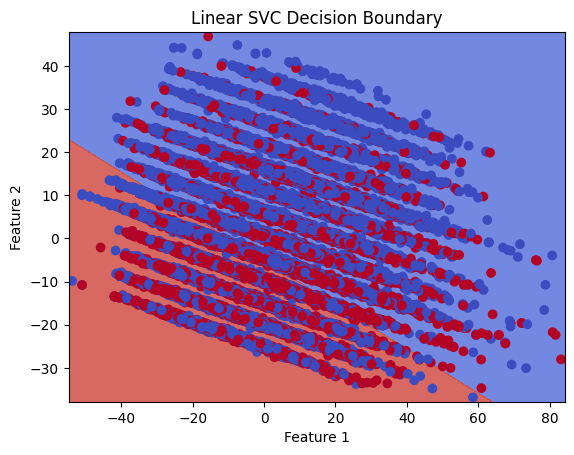

In [307]:
# Create a mesh grid to plot the decision boundary
h = 0.02
x_min, x_max = X_train[0].min() - 1, X_train[ 0].max() + 1
y_min, y_max = X_train[1].min() - 1, X_train[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid using your Linear SVC model
Z = sgd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training data points
plt.scatter(X_train[ 0], X_train[ 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVC Decision Boundary')

plt.show()

## Approach 2 - LOGISTIC REGRESSION 

In [267]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()

lr.fit(X_train , y_train )

LogisticRegression()

In [268]:
prediction = lr.predict(X_test)
prediction_proba = lr.predict_proba(X_test)
#np.set_printoptions(threshold=np.inf)
# prediction

In [269]:
prediction_proba

array([[0.45823627, 0.54176373],
       [0.81442347, 0.18557653],
       [0.7209149 , 0.2790851 ],
       ...,
       [0.54246558, 0.45753442],
       [0.45386752, 0.54613248],
       [0.5136738 , 0.4863262 ]])

In [270]:
prediction

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

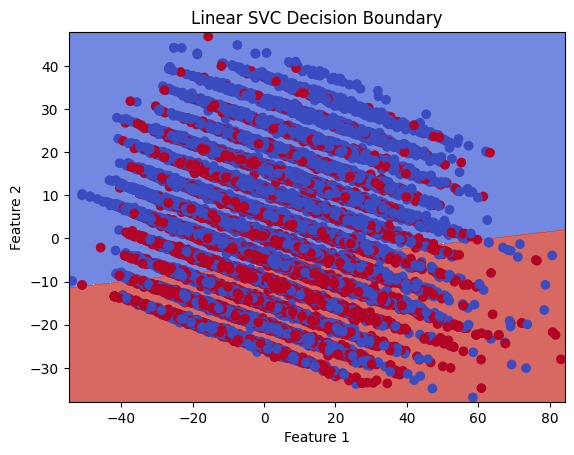

In [308]:
# Create a mesh grid to plot the decision boundary
h = 0.02
x_min, x_max = X_train[0].min() - 1, X_train[ 0].max() + 1
y_min, y_max = X_train[1].min() - 1, X_train[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid using your Linear SVC model
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training data points
plt.scatter(X_train[ 0], X_train[ 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVC Decision Boundary')

plt.show()

In [271]:
# from sklearn.metrics import confusion_matrix

# conf_mat1 = confusion_matrix(prediction , y_test)

In [272]:
# col = np.array(col)
# prediction = np.array(prediction)

# col = col.reshape(-1 , 1)
# prediction  = prediction.reshape(-1 , 1)

# sol = np.concatenate((col , prediction) , axis=1  )

# sol = pd.DataFrame(sol , columns  =['id' , 'smoking'])
# res = sol.to_csv("solution.csv")


## Approach 3 -  SVC ( a type of SVM)

In [288]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()
lin_svc.fit(X_train , y_train ) # hinge loss , 

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [274]:
prediction_svc = lin_svc.predict(X_test)

In [275]:
prediction_svc

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [276]:
''' Using the kernel of SVM , we know the SVM is a linear classifier (uses linear decision boundary )'''

' Using the kernel of SVM , we know the SVM is a linear classifier (uses linear decision boundary )'

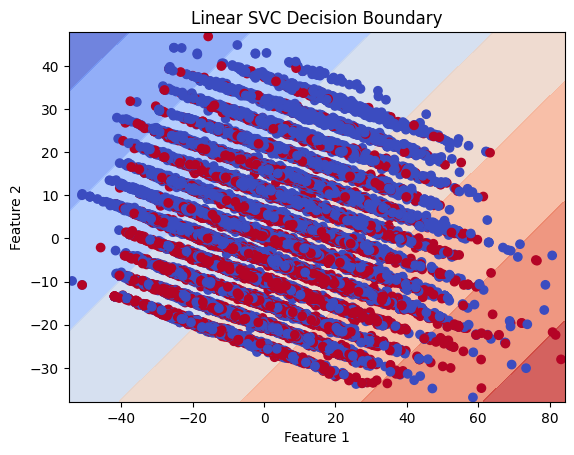

' SVM is finding optimum hyperplane , while SGD is finding optimum decision boundary  '

In [309]:
# Create a mesh grid to plot the decision boundary
h = 0.02
x_min, x_max = X_train[0].min() - 1, X_train[ 0].max() + 1
y_min, y_max = X_train[1].min() - 1, X_train[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh grid using your Linear SVC model

Z = lin_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Scatter plot of training data points
plt.scatter(X_train[ 0], X_train[ 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVC Decision Boundary')

plt.show()



''' SVM is finding optimum hyperplane , while SGD is finding optimum decision boundary  '''




In [277]:
''' WHY ANN CAN BE A GOOD APPROACH TO BINARY CLASSIFICATION 
excerpt - 

'(IJACSA) International Journal of Advanced Computer Science and Applications, 
Vol. 11, No. 1, 2020 402 |
An Artificial Deep Neural Network for the Binary Classification of Network Traffic'

'''

" WHY ANN CAN BE A GOOD APPROACH TO BINARY CLASSIFICATION \nexcerpt - \n\n'(IJACSA) International Journal of Advanced Computer Science and Applications, \nVol. 11, No. 1, 2020 402 |\nAn Artificial Deep Neural Network for the Binary Classification of Network Traffic'\n\n"

## Approach 4 - Using Artificial Neural networks 

In [281]:
model = keras.Sequential([
    # keras.layers.Input( shape=(10 , )) . 
    keras.layers.Dense(2, activation = "relu" , input_dim = 2) , 
    
    keras.layers.Dense(4 , activation="relu") ,
    keras.layers.Dense(20 , activation="relu") ,
     keras.layers.Dense(18 , activation="relu") ,
    keras.layers.Dense(1 , activation="sigmoid")
]    
)

''' BEST DESIGN - 4-20-10-1 ANN architecture for binary classification accroding to researches '''

' BEST DESIGN - 4-20-10-1 ANN architecture for binary classification accroding to researches '

In [282]:
model.compile(optimizer = "adam" , loss="binary_crossentropy" , metrics =["accuracy"])

In [283]:
model.fit(X_train , y_train , epochs = 50 , validation_split=0.2 )

Epoch 1/50
3982/3982 [==============================] - 9s 2ms/step - loss: 0.6542 - accuracy: 0.6128 - val_loss: 0.6534 - val_accuracy: 0.6150
Epoch 2/50
3982/3982 [==============================] - 7s 2ms/step - loss: 0.6509 - accuracy: 0.6181 - val_loss: 0.6533 - val_accuracy: 0.6156
Epoch 3/50
3982/3982 [==============================] - 7s 2ms/step - loss: 0.6505 - accuracy: 0.6187 - val_loss: 0.6537 - val_accuracy: 0.6156
Epoch 4/50
3982/3982 [==============================] - 6s 2ms/step - loss: 0.6500 - accuracy: 0.6204 - val_loss: 0.6524 - val_accuracy: 0.6165
Epoch 5/50
3982/3982 [==============================] - 7s 2ms/step - loss: 0.6495 - accuracy: 0.6213 - val_loss: 0.6521 - val_accuracy: 0.6174
Epoch 6/50
3982/3982 [==============================] - 7s 2ms/step - loss: 0.6493 - accuracy: 0.6223 - val_loss: 0.6514 - val_accuracy: 0.6207
Epoch 7/50
3982/3982 [==============================] - 7s 2ms/step - loss: 0.6489 - accuracy: 0.6227 - val_loss: 0.6509 - val_accuracy:

In [ ]:
prediction_nn = (model.predict(X_test) > 0.5).astype('int32')

''' WE did this extra so that final output in form of bool (positive / negative class)'''

3318/3318 [==============================] - 3s 830us/step


' WE did this extra so that final output in form of bool (positive / negative class)'

In [ ]:
prediction_nn

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

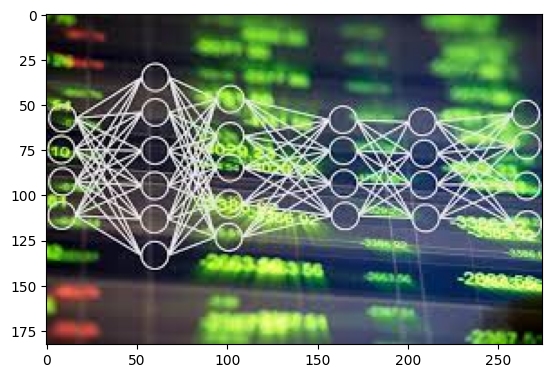

In [ ]:
x = plt.imread("hft.jpeg")
plt.imshow(x)


## Ensemble - Collecting all the results 

In [ ]:
prediction
prediction_clf
prediction_svc
prediction_nn
pred = []

prediction = prediction.reshape(-1 , 1)
prediction_clf = prediction_clf.reshape(-1 , 1)
prediction_nn = prediction_nn.reshape(-1 , 1)
prediction_svc = prediction_svc.reshape(-1 , 1)
prediction.shape

arr = np.hstack([prediction , prediction_clf , prediction_nn , prediction_svc]).T

arr = arr.reshape( 106171, 4)
majority_voted_class , _  = mode(arr , axis=1)


C:\Users\HP\AppData\Local\Temp\ipykernel_6016\808038355.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_voted_class , _  = mode(arr , axis=1)


In [ ]:
# for j in range(prediction.shape[0]-1) :
#     pred.append(np.argmax(prediction[j ,0 ] ,prediction_clf[j , 0]  , prediction_nn[j , 0]   , prediction_svc[j , 0]   ))
    
# pred

majority_voted_class 


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [ ]:
col = np.array(col)
prediction = np.array(prediction)

col = col.reshape(-1 , 1)
majority_voted_class  = majority_voted_class.reshape(-1 , 1)

sol = np.concatenate((col , majority_voted_class) , axis=1  )

sol = pd.DataFrame(sol , columns  =['id' , 'smoking'])
res = sol.to_csv("solution5.csv")

## DEPLOYMENT IN KERNEL 

In [ ]:
'''  INPUTS '''

height = input("Enter the height")
weight = input("Enter the weight")
weight = input("Enter the weight")
weight = input("Enter the weight")

'''  OUTPUTS '''
# x = np.array(height , weight )
out = model.predict(train_data[0])

print(out)

KeyError: 0

In [ ]:
'''   ACCURACY OF MODEL FROM KAGGLE '''

## General Queries for our Project 

In [ ]:
'''  

1.   Why to use both Matplotlib and Seaborn ? 
 -> both tools are great for data visulaizatio but to make some sophisticated plots like 3d graphs or more mathematically inclined plots
 , we can use  Seaborn .

2.   IS NN necesarry  for a simple job like Binary classification ? 
-> varies on the complexity of dataset and the target audience we want to reach (in buisness domains)







'''